In [20]:
#1. pandas demo
import pandas as pd

# Load data and print to confirm it worked
data = pd.read_csv(r'C:\Users\prade\Downloads\archive\salaries.csv')
print("Original data:")
print(data.head(5))

# Get and print the first 5 elements
print("\nFirst 5 elements:")
print(data.head(5))

# Get and print the last 5 elements
print("\nLast 5 elements:")
print(data.tail(5))

# Add a column and print the modified data
data['new'] = 'sample'
print("\nData with new column:")
print(data.head(5))

# Drop the column and print the result (does not modify `data` by default)
print("\nData with 'new' column dropped:")
data_dropped = data.drop('new', axis=1)
print(data_dropped.head(5))

# Print information about the DataFrame
print("\nDataFrame shape:")
print(data.shape)
print("\nDataFrame index:")
print(data.index)
print("\nDataFrame columns:")
print(data.columns)
print("\nDataFrame info():")
data.info()
print("\nDataFrame describe():")
print(data.describe())

# Rename a column and print the result (does not modify `data` by default)
print("\nDataFrame with renamed column:")
data_renamed = data.rename(columns={'new': 'renamednew'})
print(data_renamed.head(5))

# Apply a function and print the result (does not modify `data` by default)
def func(num):
    return num * 10
df_applied = data.apply(func)
print("\nDataFrame after applying function:")
print(df_applied.head(5))

# Check for null values and print results
print("\nNull values check:")
print(data.isnull().head(5))
print("\nNot null values check:")
print(data.notnull().head(5))

# Calculate and print the mean
print("\nMean of numerical columns:")
print(data.mean(numeric_only=True))

# Calculate and print the sum
print("\nSum of numerical columns:")
print(data.sum(numeric_only=True))



Original data:
   work_year experience_level employment_type             job_title  salary  \
0       2020               EN              FT   Azure Data Engineer  100000   
1       2020               EN              CT    Staff Data Analyst   60000   
2       2020               SE              FT  Staff Data Scientist  164000   
3       2020               EN              FT          Data Analyst   42000   
4       2020               EX              FT        Data Scientist  300000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         100000                 MU             0   
1             CAD          44753                 CA            50   
2             USD         164000                 US            50   
3             EUR          47899                 DE             0   
4             USD         300000                 US           100   

  company_location company_size  
0               MU            S  
1               CA         

In [4]:
# preprocessing
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer

# -------- Raw Data --------
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eva", "Frank", "Grace", "Helen", "Ian", "Julia"],
    "Age": [25, None, 29, 35, 28, 32, 27, 30, 26, 31],
    "Salary": [50000, 48000, np.nan, 52000, 49000, 51000, 47000, np.nan, 46000, 54000],
    "Department": ["HR", "IT", "Finance", "HR", "IT", "Finance", "IT", "HR", "Finance", "IT"],
    "Experience": [2, 3, 4, np.nan, 3, 5, 2, 4, 2, 6],
    "City": ["New York", "Los Angeles", "Chicago", "New York", "Los Angeles", np.nan, "Los Angeles", "New York", "Chicago", "Los Angeles"],
    "Gender": ["Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", np.nan],
    "Joined_Date": ["2019-03-14", "2018-07-09", "2017-12-23", "2020-01-17", "2019-11-30", "2016-05-05", "2021-02-11", np.nan, "2020-08-19", "2015-10-03"]
}

# -------- Columns --------
num_cols = ['Age','Salary','Experience']
cat_cols = ['Name','Department','City','Gender','Joined_Date']

#----- converting raw data to DataFrame
df = pd.DataFrame(data)
print('-----------------Raw Data-------------------')
print(df)

#-----imputattion applied - removing none values
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols]=cat_imputer.fit_transform(df[cat_cols])
num_imputer = SimpleImputer(strategy='mean')
df[num_cols]=num_imputer.fit_transform(df[num_cols])
print('-----------------Data After imputation------------------')
print(df)

#standardization - mean to 0 and sd to 1
std_scaler = StandardScaler()
df[num_cols] = std_scaler.fit_transform(df[num_cols])
print('-----------------Data After Standarization-------------------')
print(df)


#Normalisation - limiting the range of values to certain range to avoide high potential large or small values to alter prediction
nrm_scaler = MinMaxScaler()
df[num_cols]=nrm_scaler.fit_transform(df[num_cols])
print('---------------Data aftre Normaliztion-----------------------')
print(df)


df = df.drop_duplicates()
print('---------------Data after dropping duplicates-------------------')
print(df)

print(df.describe())



-----------------Raw Data-------------------
      Name   Age   Salary Department  Experience         City  Gender  \
0    Alice  25.0  50000.0         HR         2.0     New York  Female   
1      Bob   NaN  48000.0         IT         3.0  Los Angeles    Male   
2  Charlie  29.0      NaN    Finance         4.0      Chicago    Male   
3    David  35.0  52000.0         HR         NaN     New York    Male   
4      Eva  28.0  49000.0         IT         3.0  Los Angeles  Female   
5    Frank  32.0  51000.0    Finance         5.0          NaN    Male   
6    Grace  27.0  47000.0         IT         2.0  Los Angeles  Female   
7    Helen  30.0      NaN         HR         4.0     New York  Female   
8      Ian  26.0  46000.0    Finance         2.0      Chicago    Male   
9    Julia  31.0  54000.0         IT         6.0  Los Angeles     NaN   

  Joined_Date  
0  2019-03-14  
1  2018-07-09  
2  2017-12-23  
3  2020-01-17  
4  2019-11-30  
5  2016-05-05  
6  2021-02-11  
7         NaN  
8  2020

In [ ]:
#3.finds
import numpy as np

# Dataset
data = [
    ['Sunny', 'Hot', 'High', 'Weak', 0],
    ['Sunny', 'Hot', 'High', 'Strong', 0],
    ['Overcast', 'Hot', 'High', 'Weak', 1],
    ['Rainy', 'Mild', 'High', 'Weak', 1],
    ['Rainy', 'Cool', 'Normal', 'Weak', 1],
    ['Rainy', 'Cool', 'Normal', 'Strong', 0],
    ['Overcast', 'Cool', 'Normal', 'Weak', 1],
    ['Sunny', 'Mild', 'High', 'Weak', 0],
    ['Sunny', 'Cool', 'Normal', 'Weak', 1],
    ['Rainy', 'Mild', 'Normal', 'Weak', 1]
]
data = np.array(data)
def FindS(data):
    hypothesis = [None]*4
    for feature in data:
        if feature[-1] == '1':  
            for i in range(len(hypothesis)):
                if hypothesis[i] is None:
                    hypothesis[i] = feature[i]  
                elif hypothesis[i] != feature[i]:
                    hypothesis[i] = '?' 
    return hypothesis
print("Most specific hypothesis:", FindS(data))


Linear Reg -mse : 1.1913172924516304
Linear Reg -r2Score : 0.9565792141691536
-------------------------------------------------
Polynomial Reg -mse : 1.152947941709253
Polynomial Reg -r2Score : 0.95797768909402
-------------------------------------------------
Lasso -mse : 1.1331729864154763
Lasso -r2Score : 0.9586984409072156
-------------------------------------------------
Ridge -mse : 1.1871483635118525
Ridge Reg -r2Score : 0.9567311620773936


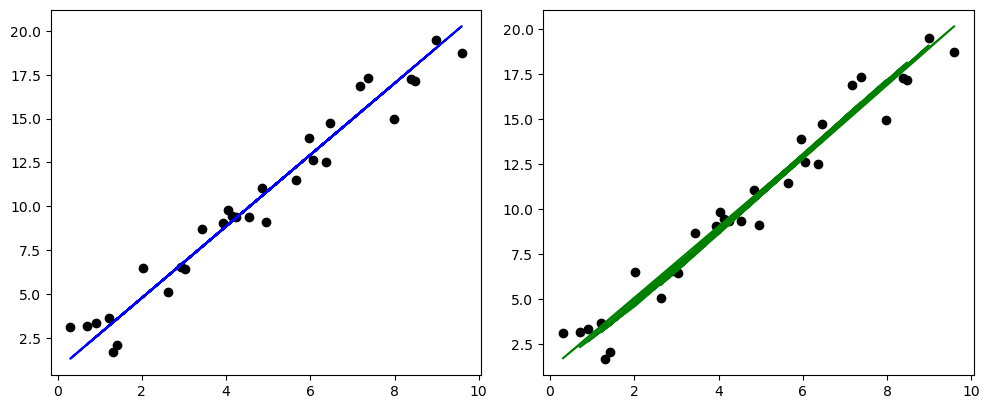

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

np.random.seed(42)
X = np.linspace(0,10,100).reshape(-1,1)
Y = 2*X.flatten()+1+np.random.normal(0,1,X.shape[0])
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=30)

linear = LinearRegression()
linear.fit(x_train,y_train)#training
y_pred = linear.predict(x_test)#predicting x_test
print(f'Linear Reg -mse : {mean_squared_error(y_test,y_pred)}')
print(f'Linear Reg -r2Score : {r2_score(y_test,y_pred)}')
print("-------------------------------------------------")

polynomial = PolynomialFeatures(degree=3)
x_poly_train = polynomial.fit_transform(x_train)
x_poly_test = polynomial.transform(x_test)
poly_model = LinearRegression()
poly_model.fit(x_poly_train,y_train)
y_poly_pred = poly_model.predict(x_poly_test)
print(f'Polynomial Reg -mse : {mean_squared_error(y_test,y_poly_pred)}')
print(f'Polynomial Reg -r2Score : {r2_score(y_test,y_poly_pred)}')
print("-------------------------------------------------")


lasso = Lasso()
lasso.fit(x_train,y_train)
y_lasso_pred = lasso.predict(x_test)
print(f'Lasso -mse : {mean_squared_error(y_test,y_lasso_pred)}')
print(f'Lasso -r2Score : {r2_score(y_test,y_lasso_pred)}')
print("-------------------------------------------------")

ridge = Ridge()
ridge.fit(x_train,y_train)
y_ridge_pred = ridge.predict(x_test)
print(f'Ridge -mse : {mean_squared_error(y_test,y_ridge_pred)}')
print(f'Ridge Reg -r2Score : {r2_score(y_test,y_ridge_pred)}')


plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.scatter(x_test,y_test,color="black",label="actual")
plt.xlabel("actual")+
plt.plot(x_test,y_pred,color="blue",label="precited lr")
plt.tight_layout()

plt.subplot(2,2,2)
plt.scatter(x_test,y_test,color='black',label='actual')
plt.plot(x_test,y_poly_pred,color='green',label='predicted pr')
plt.tight_layout()

plt.show()

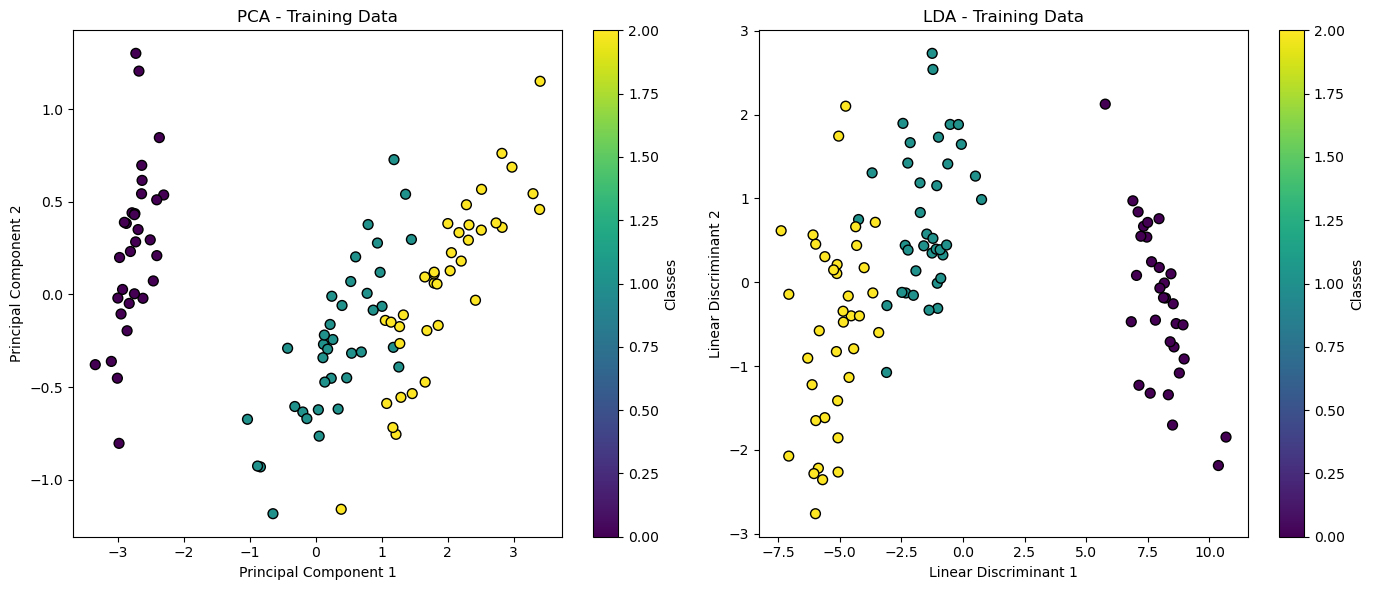

Explained variance ratio for PCA: [0.9191876  0.05549301]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset (a common dataset for classification)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. PCA - Principal Component Analysis
pca = PCA(n_components=2)  # Reducing to 2 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 2. LDA - Linear Discriminant Analysis
lda = LDA(n_components=2)  # Reducing to 2 components
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# 3. Plot the reduced data

# PCA plot
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title("PCA - Training Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Classes")

# LDA plot
plt.subplot(1, 2, 2)
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title("LDA - Training Data")
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar(label="Classes")

plt.tight_layout()
plt.show()

# Print explained variance ratio for PCA
print(f"Explained variance ratio for PCA: {pca.explained_variance_ratio_}")


Accuracy of K-NN: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



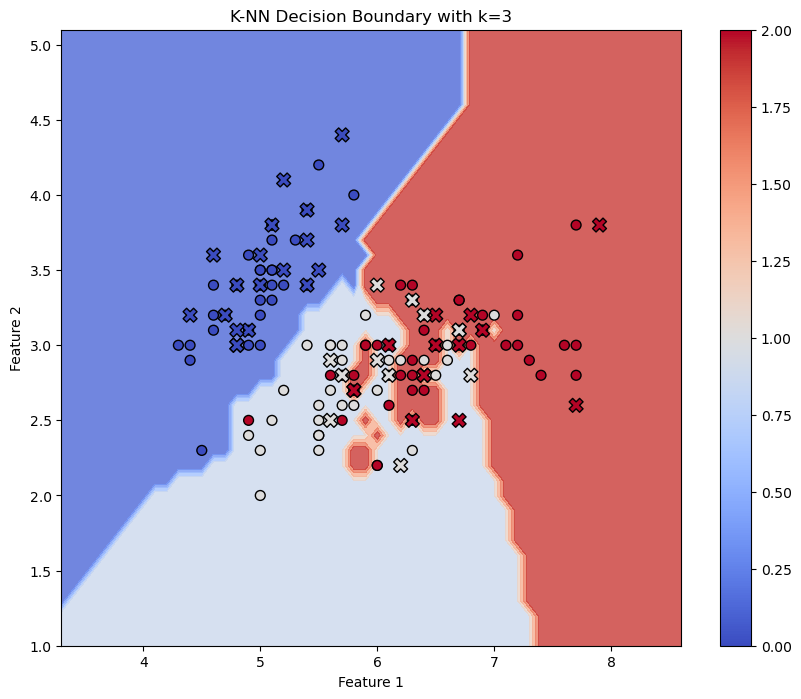

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the K-NN classifier with k=3
# knn = KNeighborsClassifier(n_neighbors=3)
knn = KNeighborsClassifier(3)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output results
print(f"Accuracy of K-NN: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the decision boundary (for the first two features)
# We will use only the first two features for simplicity in visualizing the decision boundary.
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# Train the K-NN classifier again using only the first two features
knn.fit(X_train_2d, y_train)

# Create a mesh grid for plotting
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolor='k', s=50, cmap='coolwarm')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolor='black', s=100, marker='X', cmap='coolwarm')
plt.title("K-NN Decision Boundary with k=3")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar()
plt.show()


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ----------------------------------------------------------
# 1. Create a DataFrame instead of reading a CSV file
# ----------------------------------------------------------

data = pd.DataFrame({
    'Age': [22, 35, 45, 23, 52, 46, 28, 60, 33, 40],
    'Income': [20000, 45000, 54000, 23000, 72000, 65000, 31000, 80000, 43000, 50000],
    'Loan_Amount': [3000, 8000, 15000, 4500, 20000, 12000, 5000, 22000, 7500, 9000],
    'Job_Type': ['skilled', 'unskilled', 'skilled', 'skilled', 'management', 'skilled',
                 'unskilled', 'management', 'skilled', 'skilled'],
    
    # Target column (Good=1, Bad=0)
    'Credit_Status': [1, 1, 0, 1, 0, 0, 1, 0, 1, 1]
})

print("Sample DataFrame:\n", data, "\n")

# ----------------------------------------------------------
# 2. Preprocessing
# ----------------------------------------------------------

# Encode categorical columns
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
print(data)

# Separate features and target
X = data.drop(columns=['Credit_Status'])
y = data['Credit_Status']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ----------------------------------------------------------
# 3. Model Training
# ----------------------------------------------------------

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# ----------------------------------------------------------
# 4. Evaluation Function
# ----------------------------------------------------------

def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print(classification_report(y_test, y_pred, zero_division=0))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\n")

# ----------------------------------------------------------
# 5. Print Results
# ----------------------------------------------------------

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_nb, "Naive Bayes")


Sample DataFrame:
    Age  Income  Loan_Amount    Job_Type  Credit_Status
0   22   20000         3000     skilled              1
1   35   45000         8000   unskilled              1
2   45   54000        15000     skilled              0
3   23   23000         4500     skilled              1
4   52   72000        20000  management              0
5   46   65000        12000     skilled              0
6   28   31000         5000   unskilled              1
7   60   80000        22000  management              0
8   33   43000         7500     skilled              1
9   40   50000         9000     skilled              1 

   Age  Income  Loan_Amount  Job_Type  Credit_Status
0   22   20000         3000         1              1
1   35   45000         8000         2              1
2   45   54000        15000         1              0
3   23   23000         4500         1              1
4   52   72000        20000         0              0
5   46   65000        12000         1              0
6  

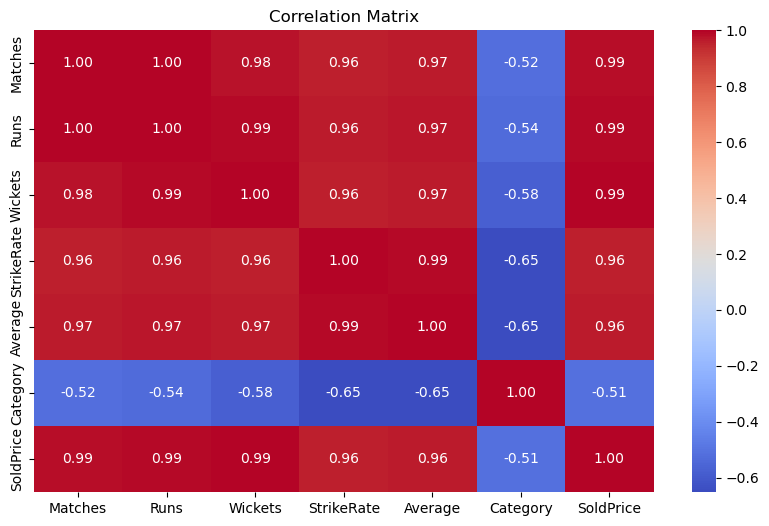

RMSE Train: 9.229697370576811e-10
RMSE Test: 480325.4361938701


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

data = pd.DataFrame({
    'Matches': [10, 12, 15, 8, 20, 18, 22, 25, 5, 30],
    'Runs': [250, 320, 410, 180, 520, 450, 600, 700, 120, 800],
    'Wickets': [5, 8, 12, 2, 15, 9, 18, 20, 1, 25],
    'StrikeRate': [130, 145, 150, 110, 155, 148, 160, 170, 105, 180],
    'Average': [35, 40, 45, 28, 48, 43, 50, 55, 20, 60],
    'Category': ['Batsman','Batsman','Allrounder','Bowler','Allrounder',
                 'Batsman','Allrounder','Batsman','Bowler','Batsman'],
    'SoldPrice': [1000000, 1500000, 2000000, 500000, 2400000,
                  1800000, 3000000, 3500000, 300000, 4500000]
})

for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

X = data.drop(columns=['SoldPrice'])
y = data['SoldPrice']

corr_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("RMSE Train:", rmse_train)
print("RMSE Test:", rmse_test)


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

data = pd.DataFrame({
    'text': [
        "Congratulations! You won a free lottery. Claim now!",
        "Reminder: Your meeting is scheduled for tomorrow.",
        "Get cheap medicines now. Limited offer!",
        "Hi John, please send the project update.",
        "WIN big prizes!!! Click this link now!",
        "Dear user, your invoice is attached.",
        "Low interest loan available. Apply now!",
        "Lunch meeting at 1 PM?",
        "FREE vacation awaits you. Hurry!",
        "Let's catch up over a call."
    ],
    'label': ["spam", "not spam", "spam", "not spam", "spam",
              "not spam", "spam", "not spam", "spam", "not spam"]
})

data['label'] = data['label'].map({'spam': 1, 'not spam': 0})

X = data['text']
y = data['label']

vectorizer = CountVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.3, random_state=42, stratify=y
)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[0 2]
 [0 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

Accuracy: 0.3333333333333333



Gini Decision Tree:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

Accuracy: 0.0

Entropy Decision Tree:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

Accuracy: 0.0


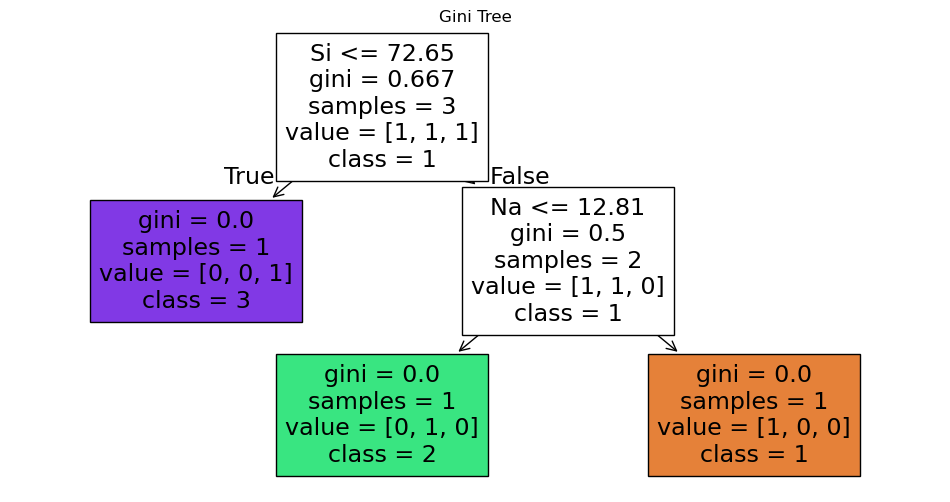

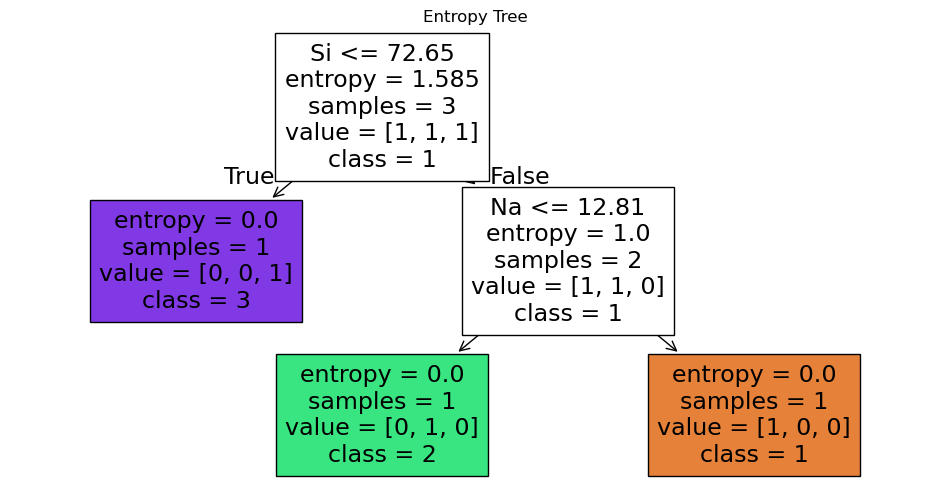


Gini Tree Structure:
|--- Si <= 72.65
|   |--- class: 3
|--- Si >  72.65
|   |--- Na <= 12.81
|   |   |--- class: 2
|   |--- Na >  12.81
|   |   |--- class: 1


Entropy Tree Structure:
|--- Si <= 72.65
|   |--- class: 3
|--- Si >  72.65
|   |--- Na <= 12.81
|   |   |--- class: 2
|   |--- Na >  12.81
|   |   |--- class: 1



In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Sample Dataset
data = pd.DataFrame({
    'RI': [1.521, 1.517, 1.516, 1.523, 1.515, 1.519],
    'Na': [13.64, 12.89, 12.73, 13.44, 12.70, 13.30],
    'Mg': [4.49, 3.60, 3.55, 3.83, 3.52, 3.58],
    'Al': [1.10, 1.36, 1.54, 1.25, 1.52, 1.41],
    'Si': [71.78, 72.73, 73.02, 72.10, 72.75, 72.57],
    'K':  [0.06, 0.48, 0.39, 0.29, 0.06, 0.26],
    'Ca': [8.75, 7.83, 7.78, 8.40, 8.75, 8.70],
    'Ba': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'Fe': [0.00, 0.29, 0.25, 0.14, 0.19, 0.12],
    'Type': [1, 1, 2, 2, 3, 3]
})

X = data.drop(columns=['Type'])
y = data['Type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

# Decision Trees
gini_tree = DecisionTreeClassifier(criterion='gini', random_state=42)
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)

gini_tree.fit(X_train, y_train)
entropy_tree.fit(X_train, y_train)

gini_pred = gini_tree.predict(X_test)
entropy_pred = entropy_tree.predict(X_test)

# Evaluation
print("\nGini Decision Tree:")
print(classification_report(y_test, gini_pred, zero_division=0))
print("Accuracy:", accuracy_score(y_test, gini_pred))

print("\nEntropy Decision Tree:")
print(classification_report(y_test, entropy_pred, zero_division=0))
print("Accuracy:", accuracy_score(y_test, entropy_pred))


# Plot Trees
plt.figure(figsize=(12, 6))
plot_tree(gini_tree, feature_names=X.columns, class_names=[str(c) for c in y.unique()], filled=True)
plt.title("Gini Tree")
plt.show()

plt.figure(figsize=(12, 6))
plot_tree(entropy_tree, feature_names=X.columns, class_names=[str(c) for c in y.unique()], filled=True)
plt.title("Entropy Tree")
plt.show()

# Tree Text
print("\nGini Tree Structure:")
print(export_text(gini_tree, feature_names=list(X.columns)))

print("\nEntropy Tree Structure:")
print(export_text(entropy_tree, feature_names=list(X.columns)))


Confusion Matrix:
[[0 0 1]
 [0 1 0]
 [0 1 0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.17      0.33      0.22         3
weighted avg       0.17      0.33      0.22         3


Accuracy Score:
0.3333333333333333


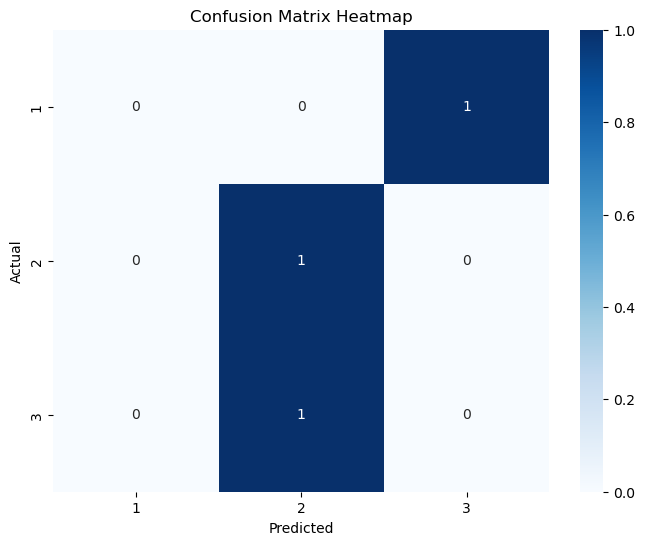

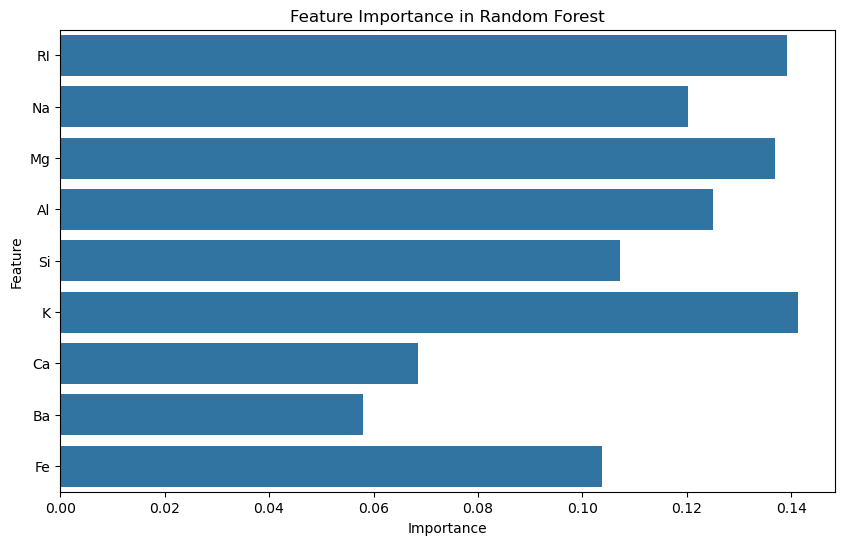

In [19]:
# Random Forest Classifier (Clean Version)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset (replacing glass.csv)
data = pd.DataFrame({
    'RI':  [1.521, 1.517, 1.516, 1.523, 1.515, 1.519, 1.522, 1.517],
    'Na':  [13.64, 12.89, 12.73, 13.44, 12.70, 13.30, 13.10, 12.80],
    'Mg':  [4.49, 3.60, 3.55, 3.83, 3.52, 3.58, 3.65, 3.55],
    'Al':  [1.10, 1.36, 1.54, 1.25, 1.52, 1.41, 1.20, 1.30],
    'Si':  [71.78, 72.73, 73.02, 72.10, 72.75, 72.57, 73.00, 72.50],
    'K':   [0.06, 0.48, 0.39, 0.29, 0.06, 0.26, 0.30, 0.40],
    'Ca':  [8.75, 7.83, 7.78, 8.40, 8.75, 8.70, 8.55, 7.90],
    'Ba':  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10, 0.0],
    'Fe':  [0.00, 0.29, 0.25, 0.14, 0.19, 0.12, 0.20, 0.15],
    'Type': [1, 1, 2, 2, 3, 3, 1, 2]
})

# Features & Target
X = data.drop(columns=['Type'])
y = data['Type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Classification Report (fixed for warnings)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Accuracy
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, orient='h')
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


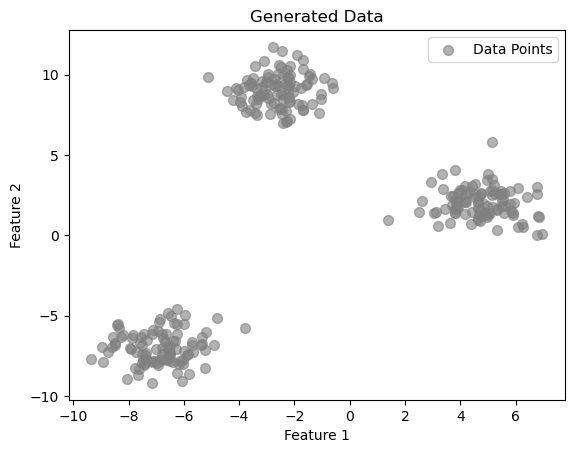

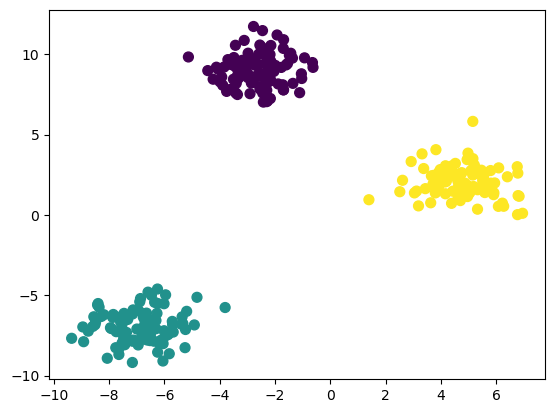

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
# Generate synthetic data
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42
X, y_true = make_blobs(n_samples=n_samples, centers=n_clusters,n_features=n_features, random_state=random_state)
# Visualize the generated data
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray', alpha=0.6, label="Data Points")
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
y_kmeans = kmeans.fit_predict(X)
# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, label="sample")


In [10]:
# from sklearn.tree import DecisionTreeClassifier
# help(DecisionTreeClassifier)

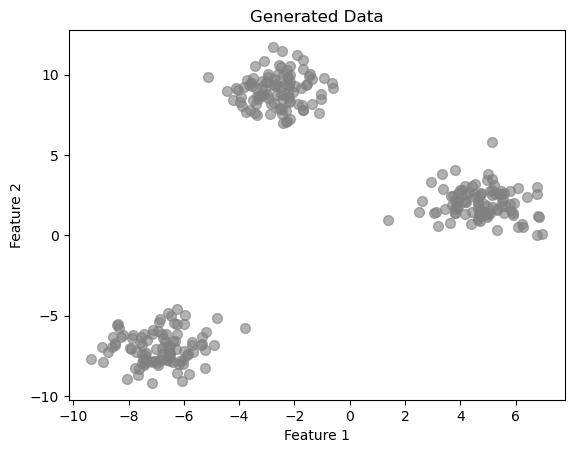

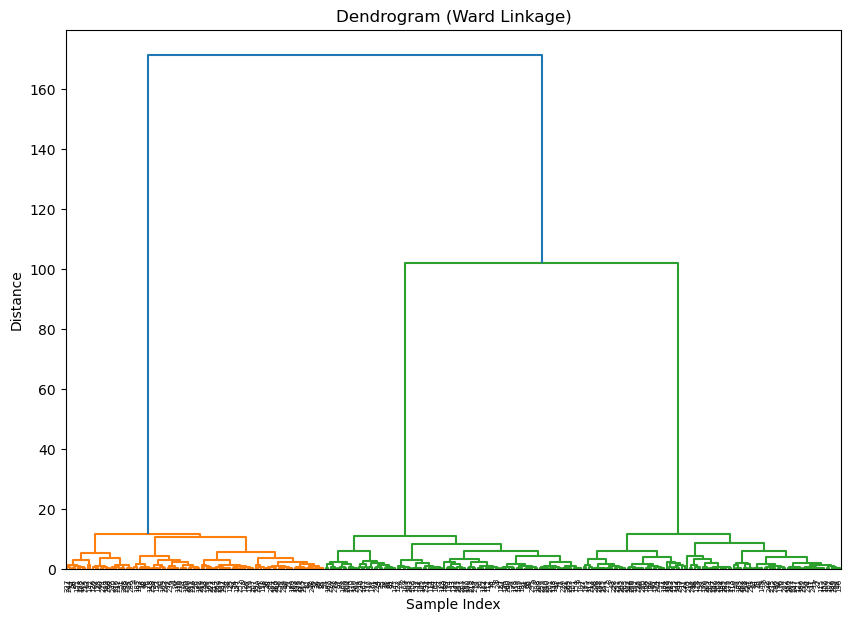

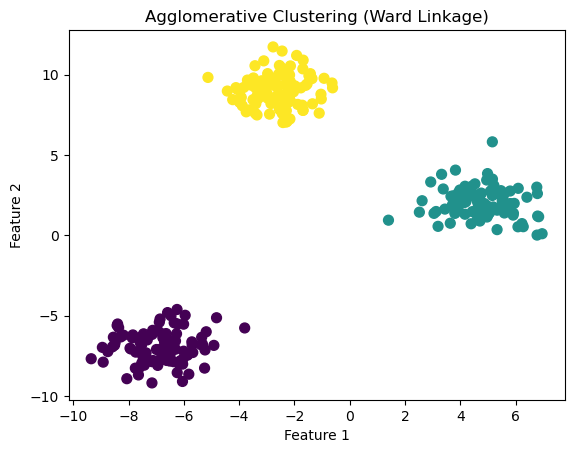

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
# Generate synthetic data
n_samples = 300
n_features = 2
random_state = 42
X, _ = make_blobs(n_samples=n_samples, centers=3, n_features=n_features, 
random_state=random_state)
# Visualize the generated data
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray', alpha=0.6)
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
# Create a linkage matrix for dendrogram
linkage_matrix = linkage(X, method='ward') # Change 'ward' to 'complete' or 'average' for other methods
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()
# Perform Agglomerative Clustering
n_clusters = 3 # Specify the number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward') # Change 'ward' as needed
labels = agg_clustering.fit_predict(X)
# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering (Ward Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

   Time   V1   V2   V3   V4   V5  Amount  Class
0    10 -1.2  0.3  1.5 -0.7  0.2     100      0
1    20  0.5 -0.4 -1.2  0.9 -0.3      50      0
2    30 -0.8  1.2  0.6 -1.4  0.7     200      0
3    40  1.1 -1.5 -0.8  0.5 -1.0      40      1
4    50 -2.0  0.9  0.4 -0.6  1.1     500      0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    8 non-null      int64  
 1   V1      8 non-null      float64
 2   V2      8 non-null      float64
 3   V3      8 non-null      float64
 4   V4      8 non-null      float64
 5   V5      8 non-null      float64
 6   Amount  8 non-null      int64  
 7   Class   8 non-null      int64  
dtypes: float64(5), int64(3)
memory usage: 644.0 bytes
None

Class Distribution:
Class
0    6
1    2
Name: count, dtype: int64

Confusion Matrix:
[[2 0]
 [1 0]]

Classification Report:
              precision    recall  f1-scor

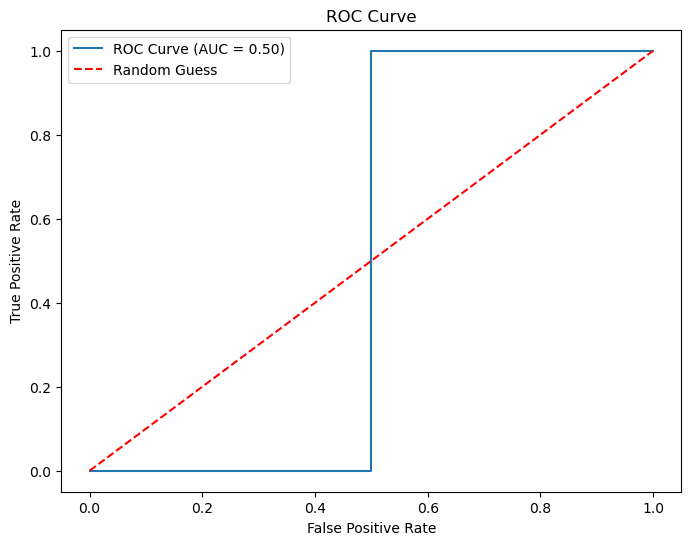

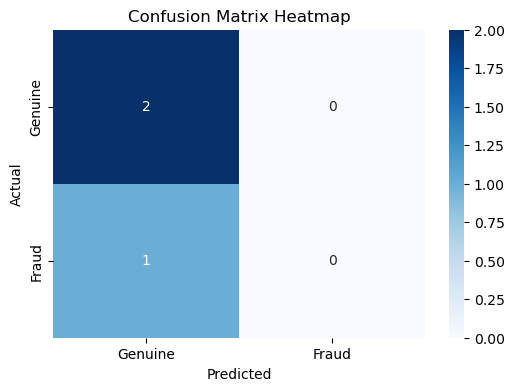

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.DataFrame({
    'Time':   [10, 20, 30, 40, 50, 60, 70, 80],
    'V1':     [-1.2, 0.5, -0.8, 1.1, -2.0, 0.7, -1.5, 1.3],
    'V2':     [0.3, -0.4, 1.2, -1.5, 0.9, -0.6, 1.0, -1.1],
    'V3':     [1.5, -1.2, 0.6, -0.8, 0.4, 1.1, -0.9, 0.3],
    'V4':     [-0.7, 0.9, -1.4, 0.5, -0.6, 1.2, -1.1, 0.8],
    'V5':     [0.2, -0.3, 0.7, -1.0, 1.1, -0.5, 0.6, -0.9],
    'Amount': [100, 50, 200, 40, 500, 30, 150, 300],
    'Class':  [0, 0, 0, 1, 0, 0, 1, 0]  # Fraud (1), Genuine (0)
})

# Data overview
print(data.head())
print("\nDataset Info:")
print(data.info())

# Check for class imbalance
print("\nClass Distribution:")
print(data['Class'].value_counts())

# Feature Scaling and Splitting Data
X = data.drop(columns=['Class'])  
y = data['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Fit Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("\nROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'r--', label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Genuine', 'Fraud'],
            yticklabels=['Genuine', 'Fraud'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
